### Stroke Prediction Dataset 
# EDA

Data source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset <br>
Data updated date: 2021-01-26

In [1]:
# import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# make notebook full width for better viewing

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# importing data
df = pd.read_csv(r'data/stroke.csv')

# Data Metadescription

| Feature | Data type | Other descriptions | Processing Needed? | Missing Value? | Encoding Needed? |
| ------- | --------- | ------------------ | ----------------- | --------------- | ---------------- |
gender | categorical | Female, Male, Other | T | T (Other) | T |
age | float64 | | F | F | F |
hypertension | int | 0, 1 | T | F | F |
heart_disease | int | 0, 1| T | F | F |
ever_married | int | 0, 1 | T | F | F |
work_type | categorical | Private, Self-employed, children, Govt_job, Never_worked | T | F | T |
residence_type | categorical | Rural, Urban | T | F | T |
avg_glucose_level | float64 | | F | F | F |
bmi | float64 | | F | T (replaced with mean) | F |
smoking_status | categorical | never smoked, unknown, formerly smoked, smokes | T | T (unknown) | T |
stroke | boolean | 0, 1 | T | F | F |

In [4]:
# read the first 5 lines of data to view dataframe
df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,male,female,male,female,female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,1,1,1,1,1
work_type,private,self-employed,private,private,self-employed
residence_type,urban,rural,rural,urban,rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.893237,32.5,34.4,24.0


In [5]:
print('Number of rows: ', df.shape[0], '\nNumber of columns: ', df.shape[1])
print('Number of \'id\' in this data:', df.id.nunique())

# row count is the same as unique id count, so setting id as index
df = df.set_index('id')

Number of rows:  5110 
Number of columns:  12
Number of 'id' in this data: 5110


In [6]:
df.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,0.475034,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Individual Feature EDA

In [7]:
# categorize data for EDA later
categorical = ['gender', 'work_type', 'residence_type', 'smoking_status']
boolean = ['hypertension', 'heart_disease', 'ever_married', 'stroke']
quant = ['age', 'avg_glucose_level', 'bmi']

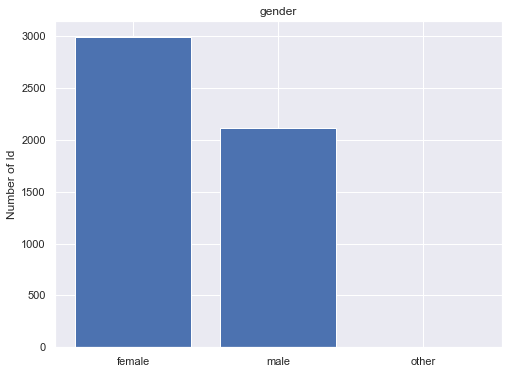

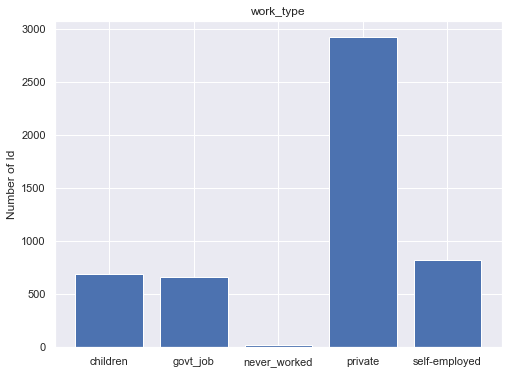

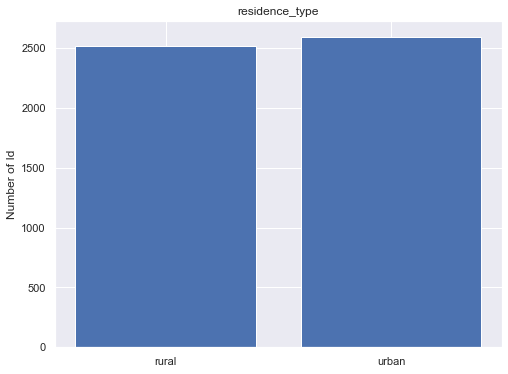

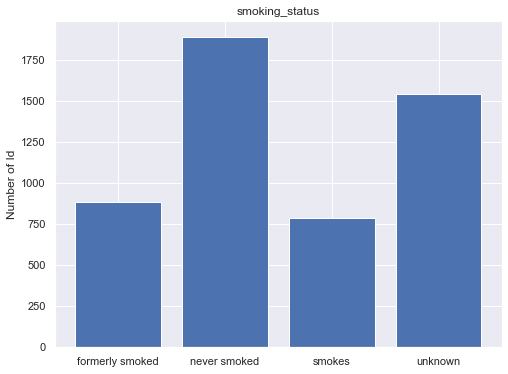

In [8]:
# using seaborn's style
sns.set()

#loop though categorical categories to create bar chart for each categories

for i in categorical:
    df_plot = df.reset_index().groupby(i).agg({'id':'count'})
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(df_plot.index, df_plot['id'])
    ax.set_title(i)
    ax.set_ylabel('Number of Id')
    plt.show()

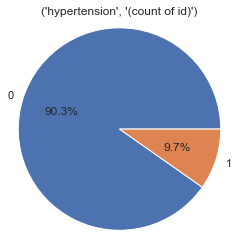

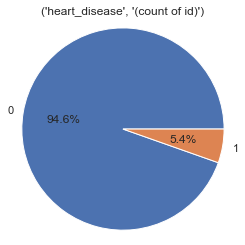

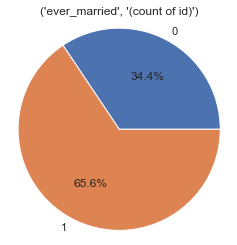

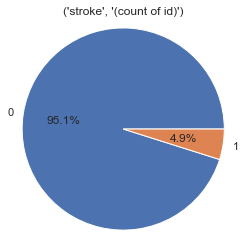

In [9]:
#loop though categorical categories to create pie chart for each boolean

for i in boolean:
    df_plot = df.reset_index().groupby(i).agg({'id':'count'})
    fig, ax = plt.subplots(figsize=(4,4))
    ax.pie(df_plot['id'], labels=df_plot.index, autopct='%1.1f%%')
    ax.set_title((i, '(count of id)'))
    ax.axis('equal')
    plt.show()

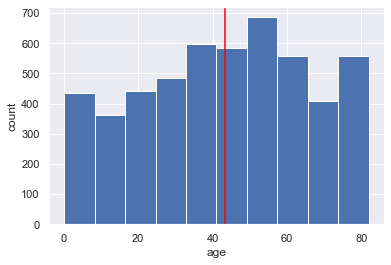

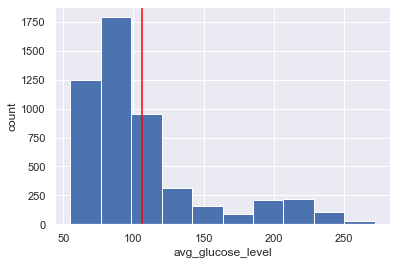

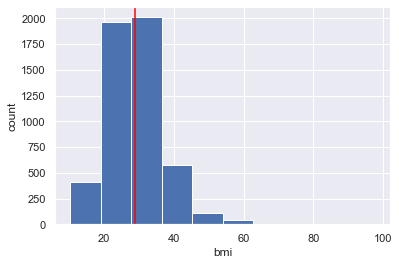

In [10]:
for i in quant:
    _ = plt.hist(df[i])
    _ = plt.xlabel(i)
    _ = plt.ylabel('count')
    plt.axvline(df[i].mean(), color='red')
    plt.show()

### Outliers

It looks like average glucose level and bmi has a pretty long tail on the right side of the chart.

- average_glucose_level
- bmi

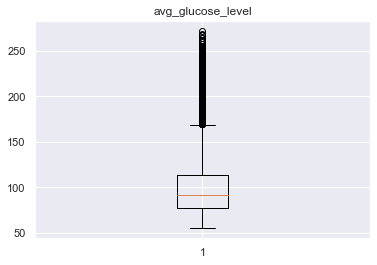

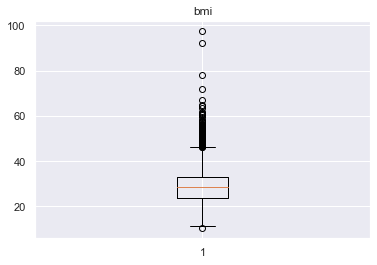

In [11]:
for i in ['avg_glucose_level', 'bmi']:
    _ = plt.boxplot(df[i])
    plt.title(i)
    plt.show()

- avg_glucose_level <br>
    There are quite a lot of data points 1.5 standard deviation away, but none are really outliers.

- bmi <br>
    There are about 4 data points that appear to be higher than 70, this might skew out dataset. But we'll do some more exploration into the relationship between features first before deciding what to do with it.

In [12]:
# get a list of people who are outliers for bmi
df[df['bmi'] > 58].sort_values('bmi')

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
32604,male,49.0,0,0,1,self-employed,rural,215.81,58.1,never smoked,0
23047,male,43.0,0,0,1,private,urban,100.16,59.7,never smoked,0
1307,female,61.0,1,0,1,private,rural,170.05,60.2,smokes,0
72911,female,57.0,1,0,1,private,rural,129.54,60.9,smokes,0
5131,female,51.0,0,0,1,private,urban,107.72,60.9,unknown,0
65895,female,52.0,0,0,1,private,urban,98.27,61.2,unknown,0
72784,female,52.0,0,0,1,private,rural,118.46,61.6,smokes,0
20292,female,24.0,0,0,1,private,urban,85.55,63.3,never smoked,0
70670,female,27.0,0,0,1,private,rural,57.96,64.4,never smoked,0


# Feature Exploration

Explore into the relationship of each features to stroke, and each feature's relationship to each other.

In [13]:
# Number of people who has stroke:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

- we have an imbalanced dataset

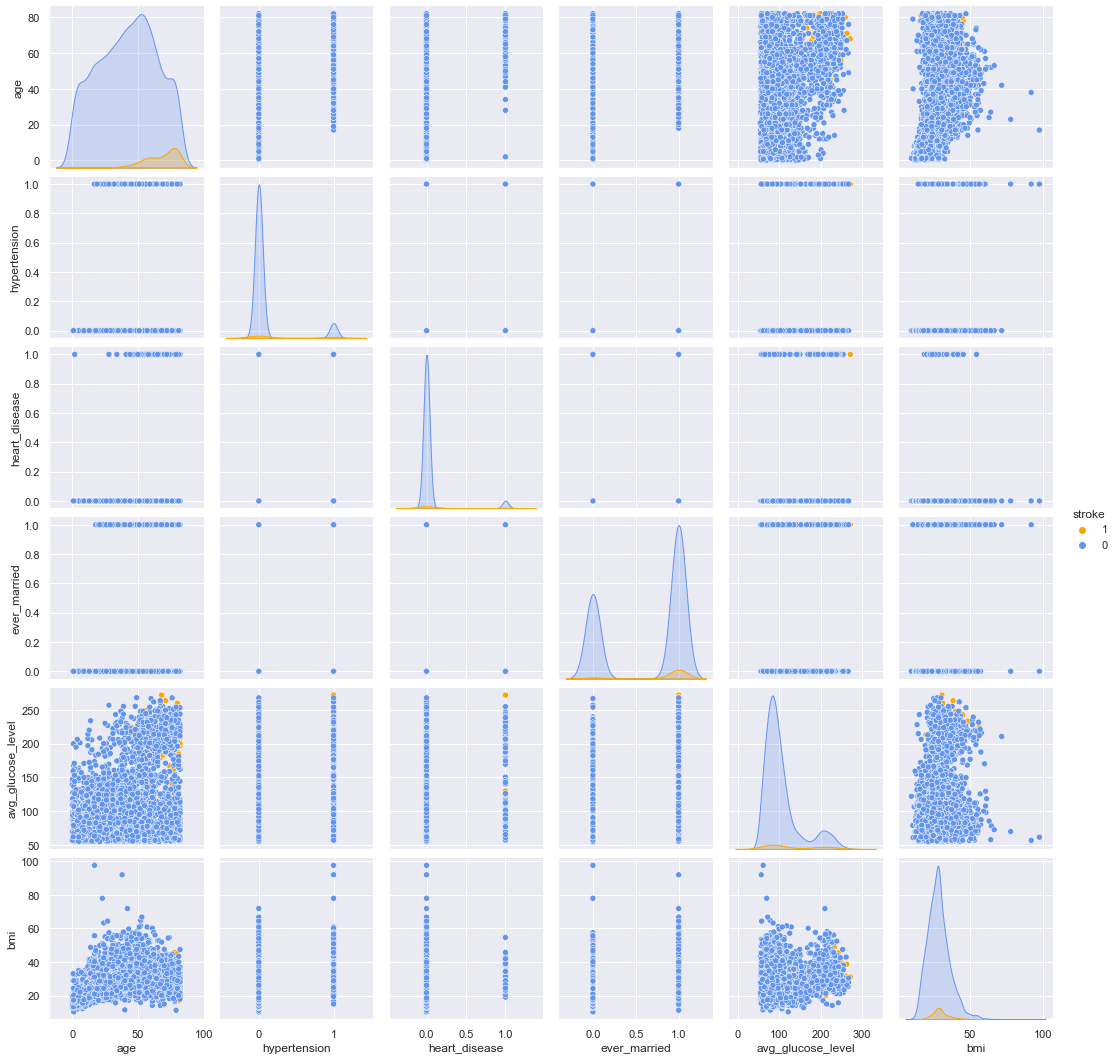

In [14]:
sns.pairplot(df, hue='stroke', hue_order=[1,0], kind='scatter', diag_kind='kde', palette={0:'cornflowerblue', 1:'orange'})

- Looks like age and ever_married has some relationship with stroke

### Numerical Data

<AxesSubplot:>

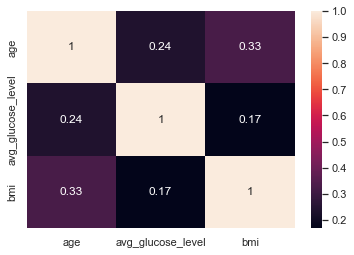

In [15]:
corr1 = ['age', 'avg_glucose_level', 'bmi']
sns.heatmap(df[corr1].corr(), annot=True)

- The pearson correlation chart above shows that there's no significant relation between each other.

##### t-test

In one sample t-test, the sample mean is compared with the hypothesized values, whereas in two sample t-test ( independent or unpaired t test), means of two independent groups are compared. In paired t-test, differences between the pair of dependent variables are compared.

In [16]:
from scipy import stats
for col in corr1:
    stroke = df[df['stroke'] == 1][col].to_numpy()
    no_stroke = df[df['stroke'] == 0][col].to_numpy()
    
    alpha = 0.05
    
    res = stats.ttest_ind(a=stroke, b=no_stroke, equal_var=True)
    p = res.pvalue
    
    # interpret via p-value
    if p > alpha:
        print('{}: Accept null hypothesis that the means are equal. p-value: {}'.format(col, p))
    else:
        print('{}: Reject the null hypothesis that the means are equal. p-value: {}'.format(col, p))

age: Reject the null hypothesis that the means are equal. p-value: 7.0307775129939774e-71
avg_glucose_level: Reject the null hypothesis that the means are equal. p-value: 2.7678105194741054e-21
bmi: Reject the null hypothesis that the means are equal. p-value: 0.005361957129403547


### Categorical Data

In [17]:
misc = categorical + boolean

In [18]:
misc

['gender',
 'work_type',
 'residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease',
 'ever_married',
 'stroke']

In [19]:
pd.pivot_table(df, values=['stroke'], index='gender',aggfunc=({'stroke':percent_total}))

NameError: name 'percent_total' is not defined

In [ ]:
# plot misc to see percent total in bar chart
fig, axs = plt.subplots(3,3, figsize=(18,18))

axs = axs.ravel()

def percent_total(x):
        return sum(x)/df.shape[0]*100
    
for i in range(0,7):
    dataframe = pd.pivot_table(df, values=['stroke'], index=misc[i],aggfunc=({'stroke':percent_total}))
    axs[i].bar(dataframe.index,dataframe['stroke'])
    axs[i].set_title(misc[i])

fig.delaxes(axs[8])
fig.delaxes(axs[7])
plt.suptitle('Percent of Stroke in Each Category')
plt.show()

- Visually, we can easily see that there might be a relationship between stroke and (1)ever married (2)heart_disease (3)hypertension

Let's explore to see if it passes the chi-squared test

### Chi-squared test for all categorical data:

In [ ]:
for i in misc[:-1]:
    print('===========', i, '===========')
    contingency_table = pd.crosstab(df[i], df.stroke)
    stat, p, dof, expected = chi2_contingency(contingency_table)
    
    # interpret p-value
    alpha = 1.0 - prob
    if p <= alpha:
        print('\np-value: Dependent (reject H0)', round(p, 3))
    else:
        print('\np-value: Independent (fail to reject H0)', round(p, 3))
    
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('\nt-stats: Dependent (reject H0)', round(stat,3))
    else:
        print('\nt-stats: Independent (fail to reject H0)', round(stat,3))
    print('\n')

For categorical data, These features below look like they are statistically significant that they are dependent variables of stroke.
- work type: (2.9%) of people whose work type is private had stroke.
- smoking status: (1.8%) of people who has never smoked had stroke
- hypertension: (3.6%) of people who has no hypertension had stroke
- heart disease:(4%) of people who has no heart disease had stroke
- ever_married: (4.3%) of married people had stroke

While the features below didn't pass the chi-squared test
- Gender
- Residence_type

# Conclusion:
In summary, there are all features ranked in terms of correlation with stroke... arranged in sequence

<b>numerical features</b>:
1. age
2. avg_glucose_level
3. bmi

<b>categorical features</b>:
1. ever_married
2. heart_disease
3. hypertension
4. work_type
5. smoking_status